In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../datasets/train_iris.csv', index_col=0)

In [3]:
X_train = data.drop(['species'], axis=1)

In [4]:
X_train.head()

,sepal length,sepal width,petal length,petal width
130,7.4,2.8,6.1,1.9
7,5.0,3.4,1.5,0.2
11,4.8,3.4,1.6,0.2
142,5.8,2.7,5.1,1.9
109,7.2,3.6,6.1,2.5


In [5]:
y_train = data[['species']]

In [6]:
y_train.head()

,species
130,2
7,0
11,0
142,2
109,2


In [7]:
test = pd.read_csv('../datasets/test_iris.csv', index_col=0)

In [8]:
X_test = test.drop(['species'], axis=1)

In [9]:
y_test = test[['species']]

In [10]:
max_depth_range = range(1,100)

In [11]:
score_data = pd.DataFrame()

In [12]:
rs = np.random.seed(0)
for max_depth in max_depth_range:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],'train_score': [train_score],'test_score': [test_score],'mean_cv_score': [mean_cv_score]})
    
    score_data = score_data.append(temp_score_data)

In [13]:
score_data.head(3)

,max_depth,train_score,test_score,mean_cv_score
0,1,0.70,0.60,0.70
0,2,0.97,0.94,0.95
0,3,0.99,0.94,0.96


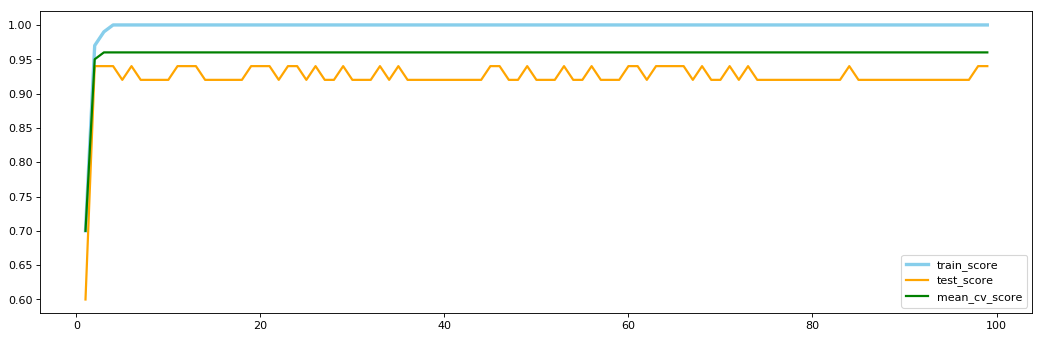

In [14]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 5), dpi=80, facecolor='w', edgecolor='k')


plt.plot('max_depth', 'train_score', data=score_data, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=3)
plt.plot('max_depth', 'test_score', data=score_data, marker='', color='orange', linewidth=2)
plt.plot('max_depth', 'mean_cv_score', data=score_data, marker='', color='green', linewidth=2)
plt.legend();

[Text(133.92000000000002, 195.696, 'X[3] <= 0.8\nentropy = 1.581\nsamples = 100\nvalue = [35, 30, 35]'),
 Text(66.96000000000001, 152.208, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(200.88000000000002, 152.208, 'X[3] <= 1.75\nentropy = 0.996\nsamples = 65\nvalue = [0, 30, 35]'),
 Text(133.92000000000002, 108.72, 'X[2] <= 4.95\nentropy = 0.439\nsamples = 33\nvalue = [0, 30, 3]'),
 Text(66.96000000000001, 65.232, 'entropy = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(200.88000000000002, 65.232, 'X[3] <= 1.6\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(133.92000000000002, 21.744, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84000000000003, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'entropy = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

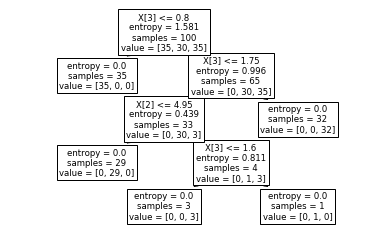

In [15]:
tree.plot_tree(clf)